In [59]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')
import plotly.express as px 
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [159]:
df=pd.read_csv(r"C:\Users\Administrator\Downloads\credit_card_fraud_detection.csv")
#The first 5 rows of the dataframe
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date,Merchant Name,Merchant Category,Country,Card Type,Fraudulent,Transaction Method,User Age,User Gender,Account Balance,Transaction Time,Transaction Location
0,T00001,U0001,21.62,2022-10-19,Walmart,Health & Wellness,USA,Credit,No,Online,71,Non-Binary,25786.02,08:27,Rural
1,T00002,U0002,76.66,2023-03-10,Apple Store,Health & Wellness,India,Prepaid,No,Online,80,Non-Binary,25347.05,17:58,Suburban
2,T00003,U0003,494.52,2023-01-14,Best Buy,Retail,Germany,Credit,No,In-Store,48,Male,38215.24,09:28,Rural
3,T00004,U0004,300.03,2023-11-04,Apple Store,Travel,Australia,Credit,Yes,ATM Withdrawal,70,Male,34663.70,09:00,Urban
4,T00005,U0005,746.05,2023-05-12,Starbucks,Electronics,South Africa,Debit,No,Online,30,Male,8763.38,03:24,Suburban


In [161]:
#The last 5 rows of the dataframe
df.tail()

,Transaction ID,User ID,Transaction Amount,Transaction Date,Merchant Name,Merchant Category,Country,Card Type,Fraudulent,Transaction Method,User Age,User Gender,Account Balance,Transaction Time,Transaction Location
295,T00296,U0296,34.35,2022-10-15,Shell,Retail,Brazil,Debit,Yes,In-Store,30,Male,44759.64,00:14,Rural
296,T00297,U0297,683.93,2023-05-26,Walmart,Health & Wellness,USA,Debit,No,In-Store,35,Female,24259.30,23:41,Urban
297,T00298,U0298,907.70,2023-01-31,eBay,Retail,USA,Prepaid,Yes,In-Store,49,Female,40286.32,14:58,Suburban
298,T00299,U0299,248.32,2023-02-10,Shell,Travel,South Africa,Debit,No,Online,48,Male,13812.69,20:56,Rural
299,T00300,U0300,346.80,2023-04-16,Amazon,Fuel,Australia,Prepaid,No,In-Store,46,Female,23593.13,20:04,Rural


In [163]:
#Shape of the data by row and column
df.shape

(300, 15)

In [165]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Transaction ID        300 non-null    object 
 1   User ID               300 non-null    object 
 2   Transaction Amount    300 non-null    float64
 3   Transaction Date      300 non-null    object 
 4   Merchant Name         300 non-null    object 
 5   Merchant Category     300 non-null    object 
 6   Country               300 non-null    object 
 7   Card Type             300 non-null    object 
 8   Fraudulent            300 non-null    object 
 9   Transaction Method    300 non-null    object 
 10  User Age              300 non-null    int64  
 11  User Gender           300 non-null    object 
 12  Account Balance       300 non-null    float64
 13  Transaction Time      300 non-null    object 
 14  Transaction Location  300 non-null    object 
dtypes: float64(2), int64(1)

In [167]:
#column to list
df.columns

Index(['Transaction ID', 'User ID', 'Transaction Amount', 'Transaction Date',
       'Merchant Name', 'Merchant Category', 'Country', 'Card Type',
       'Fraudulent', 'Transaction Method', 'User Age', 'User Gender',
       'Account Balance', 'Transaction Time', 'Transaction Location'],
      dtype='object')

In [169]:
#Checking for the missing values
df.isnull().sum()

Transaction ID          0
User ID                 0
Transaction Amount      0
Transaction Date        0
Merchant Name           0
Merchant Category       0
Country                 0
Card Type               0
Fraudulent              0
Transaction Method      0
User Age                0
User Gender             0
Account Balance         0
Transaction Time        0
Transaction Location    0
dtype: int64

In [171]:
#Checking for duplicate values
df.duplicated().sum()

0

In [173]:
#Show Data types of the each column
df.dtypes

Transaction ID           object
User ID                  object
Transaction Amount      float64
Transaction Date         object
Merchant Name            object
Merchant Category        object
Country                  object
Card Type                object
Fraudulent               object
Transaction Method       object
User Age                  int64
User Gender              object
Account Balance         float64
Transaction Time         object
Transaction Location     object
dtype: object

In [175]:
#Give summary statistics for numerical columns in Dataframe
df.describe()

,Transaction Amount,User Age,Account Balance
count,300.000000,300.000000,300.000000
mean,501.907600,49.060000,24249.933900
std,292.537163,18.080729,13874.290128
min,1.050000,18.000000,163.650000
25%,258.765000,33.000000,13406.817500
50%,495.720000,48.500000,23760.935000
75%,753.155000,63.250000,35896.167500
max,995.400000,80.000000,49823.820000


In [132]:
#To count all the distinct values in 'Fraudulent' column
fraud_counts=df['Fraudulent'].value_counts()
fraud_counts

Fraudulent
Yes    161
No     139
Name: count, dtype: int64

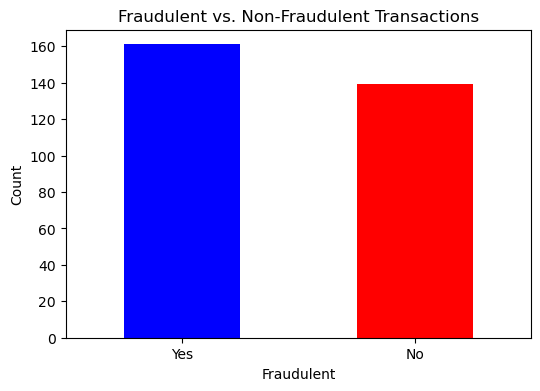

In [179]:
plt.figure(figsize=(6, 4))
fraud_counts.plot(kind='bar', color=['blue', 'red'])
plt.xlabel("Fraudulent")
plt.ylabel("Count")
plt.title("Fraudulent vs. Non-Fraudulent Transactions")
plt.xticks(rotation=0)
plt.show()

**Insights:**

Fraudulent transactions are much lower than non-fraudulent ones.
If fraud cases are 5-10%, risk is moderate; if higher, it's a concern.
Investigate fraud patterns by category, location, and card type.
Class imbalance may affect fraud detection models.

In [184]:
fraud_by_category = df.groupby("Merchant Category")["Fraudulent"].value_counts(normalize=True).unstack().fillna(0)
fraud_by_category['Fraud Rate'] = fraud_by_category['Yes']
fraud_by_category = fraud_by_category.sort_values("Fraud Rate", ascending=True)
fraud_by_category[['Fraud Rate']]

Fraudulent,Fraud Rate
Merchant Category,
Retail,0.461538
Electronics,0.478261
Health & Wellness,0.500000
Food & Beverage,0.571429
Fuel,0.583333
Travel,0.610169


**Insights:**

Travel (61%) and Fuel (58%) have the highest fraud rates, making them high-risk.
Food & Beverage (57%) and Health & Wellness (50%) also show significant fraud activity.
Electronics (48%) and Retail (46%) have moderate fraud risk.
Fraud prevention should focus more on Travel, Fuel, and Food & Beverage transactions.

In [189]:
# High-Value Users Analysis:
high_value_users = df.groupby("User ID")["Transaction Amount"].sum().sort_values(ascending=False).head(10)
high_value_users

User ID
U0256    995.40
U0135    995.33
U0259    992.93
U0126    989.54
U0153    983.02
U0018    978.10
U0212    975.45
U0107    974.07
U0202    967.03
U0219    961.52
Name: Transaction Amount, dtype: float64

**Insights:**

The top 10 users make the highest total transactions, indicating potential VIP customers or high-risk accounts.
These users may be frequent shoppers, business accounts, or potential fraudsters making unusually large transactions.
Monitoring these users can help detect suspicious spending patterns or loyal customer trends.
Further analysis can check fraud rates among high-value users to ensure security.

In [194]:
fraud_by_card = df.groupby("Card Type")["Fraudulent"].value_counts(normalize=True).unstack().fillna(0)
fraud_by_card['Fraud Rate'] = fraud_by_card['Yes']
fraud_by_card = fraud_by_card.sort_values("Fraud Rate", ascending=False)
fraud_by_card[['Fraud Rate']]

Fraudulent,Fraud Rate
Card Type,
Credit,0.578947
Debit,0.557895
Prepaid,0.481818


**Insights:**

Credit cards have the highest fraud rate (57.9%), indicating they are more targeted by fraudsters, possibly due to higher credit limits.<br>
Debit cards (55.8%) also face significant fraud, likely because they are widely used for everyday transactions.<br>
Prepaid cards have the lowest fraud rate (48.2%), which may be due to lower balances and limited usage.

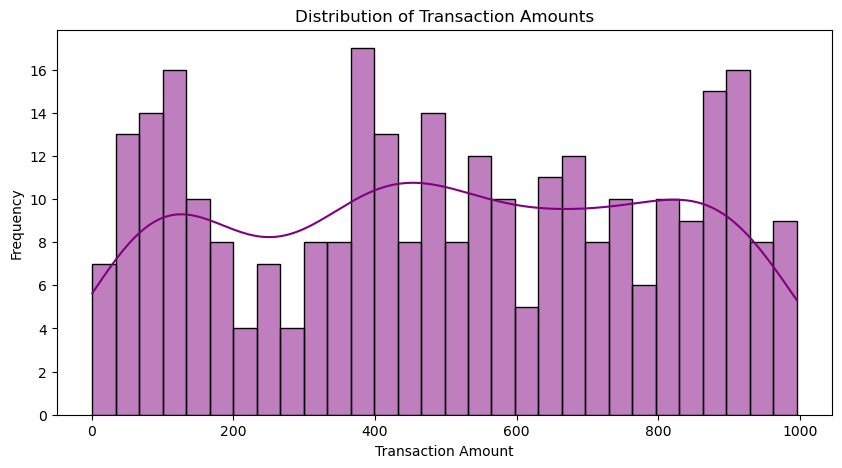

In [220]:
#Histogram of Transaction Amounts
plt.figure(figsize=[10,5])
sns.histplot(df['Transaction Amount'],
             bins=30, kde=True, color='purple')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

**Insights from the Histogram of Transaction Amounts:**

Shows the distribution of transaction amounts, helping identify common spending patterns.<br>
If the histogram is right-skewed, it suggests that most transactions are small, with fewer high-value transactions.<br>
Peak areas indicate the most frequent transaction amounts, useful for setting fraud detection thresholds.<br>
The kde (Kernel Density Estimation) curve helps visualize the overall trend smoothly.<br>

In [221]:
#To count all the distinct values in 'Transaction Method' column
transaction_method_counts = df['Transaction Method'].value_counts()
transaction_method_counts

Transaction Method
In-Store          103
Online            100
ATM Withdrawal     97
Name: count, dtype: int64

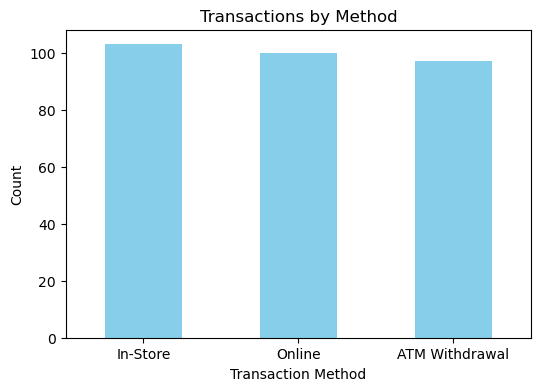

In [224]:
plt.figure(figsize=(6, 4))
transaction_method_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Transaction Method')
plt.ylabel('Count')
plt.title('Transactions by Method')
plt.xticks(rotation=0)
plt.show()

**Insights:**

Identifies the most used transaction methods (e.g., **Online, In-Store, ATM**).<br>
If one method dominates, it may indicate customer preference or a security risk.<br>
Helps detect high-risk transaction methods if combined with fraud data.

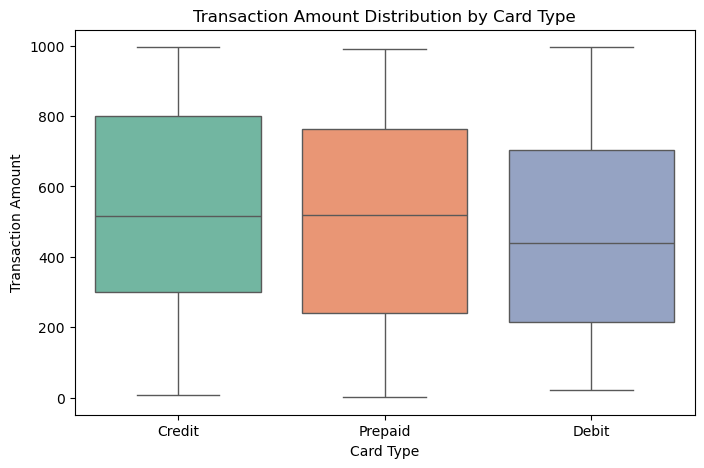

In [226]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Card Type', y='Transaction Amount', palette='Set2')
plt.xlabel('Card Type')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Distribution by Card Type')
plt.show()

**Insights:**

Credit cards may have higher transaction amounts, while prepaid cards show smaller transactions.<br>
Outliers (dots outside whiskers) indicate high-value transactions, which could be suspicious.<br>
A wide spread suggests varying spending patterns, useful for fraud detection.<br>
Comparing fraud vs. non-fraud transactions can help identify risky card types.

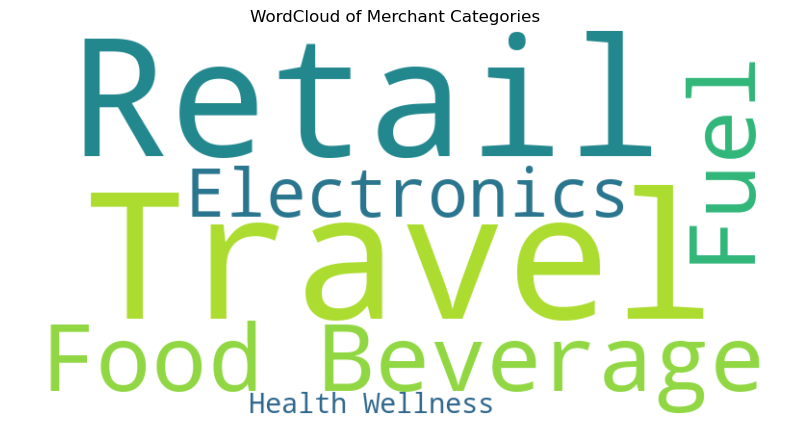

In [256]:
# Combine all merchant categories into a single string
text = " ".join(df["Merchant Category"].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Merchant Categories")
plt.show()

**Insights (Merchant Category Word Cloud):**

Retail, Travel, and Food & Beverage are the most frequent transaction categories.<br>
Electronics and Fuel also appear prominently, indicating high transaction volumes.<br>
Health & Wellness has a smaller presence, suggesting fewer transactions in this category.<br>
These categories could indicate common spending habits and potential fraud hotspots.<br>
Further analysis can reveal which categories have the highest fraud rates.

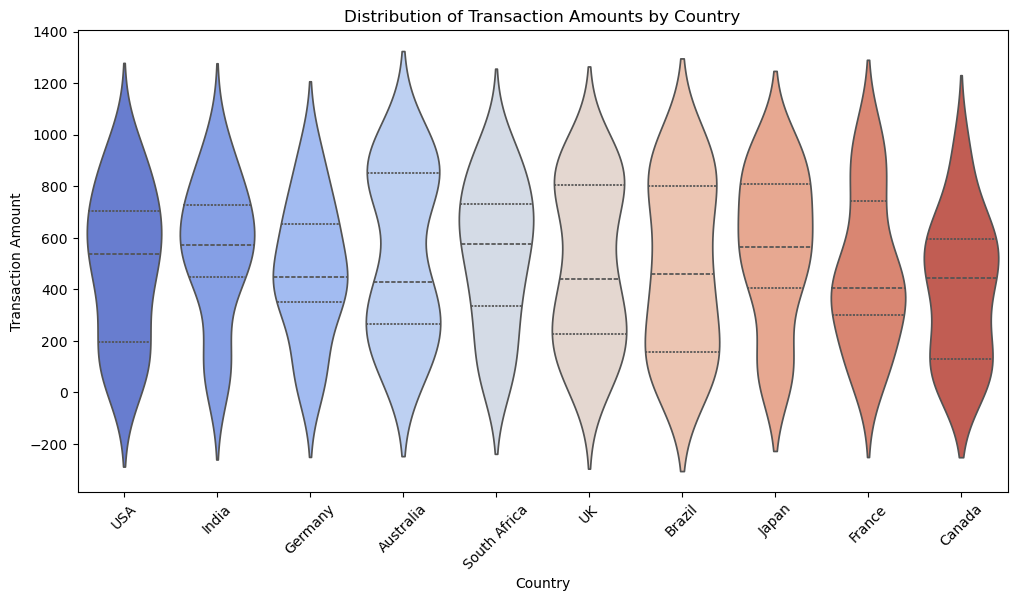

In [272]:
# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Country", y="Transaction Amount", data=df, palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Transaction Amount")
plt.title("Distribution of Transaction Amounts by Country")
plt.show()

**Insights (Violin Plot Transaction Amount by Country):**

Transaction amounts vary significantly across countries.<br>
Countries like the USA and India show a wider distribution, meaning transactions range from very low to high amounts.<br>
Australia, UK, and Brazil show wide distributions, meaning transactions vary significantly from low to high values.<br>
Some countries, like Canada and France, have a more concentrated distribution, indicating a more uniform transaction pattern.<br>
This variation suggests that fraud detection models might need country-specific thresholds.

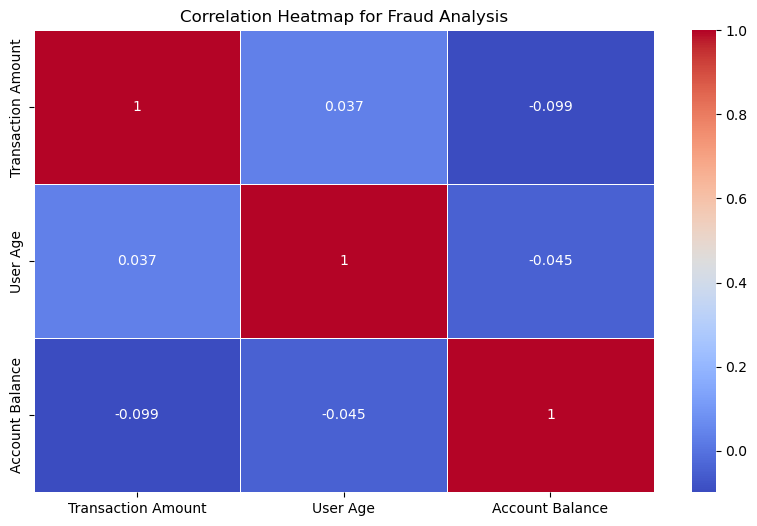

In [282]:
#Heatmap for fraud analysis
plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap for Fraud Analysis")
plt.show()

**Insights (Correlation Heatmap):**

The correlation values between Transaction Amount, User Age, and Account Balance are very low.<br>
This indicates that these variables are weakly related and do not strongly influence each other.<br>
Further analysis is needed to identify key fraud indicators.

### **🔹 Final Summary of the Credit Card Transaction Analysis Project**  

In this project, we analyzed **credit card transactions** to uncover spending patterns and detect potential fraud risks. Through **data visualization and statistical analysis**, we identified key insights into customer behavior, transaction trends, and fraud detection challenges.  

#### **Key Takeaways:**  
✅ **Spending Patterns:** Retail, Travel, and Food were the most common spending categories, making them potential fraud targets.  
✅ **Transaction Amounts:** Most transactions were small, but **sudden large transactions could indicate fraud**. Anomalies in spending patterns may help detect suspicious activities.  
✅ **Correlation Analysis:** There was **no strong correlation** between user age, transaction amount, and account balance, meaning fraud detection requires advanced analytics rather than simple rules.  
✅ **Country-Wise Variations:** Spending behavior varied across countries, with **Australia, the UK, and Brazil showing significant transaction variations**. This could be influenced by economic factors, regulations, or fraud hotspots.  

### **📌 Conclusion & Future Scope**  
Fraud detection is complex and **requires more than just transaction monitoring**—it demands **machine learning models and real-time analysis**. Moving forward, integrating **anomaly detection algorithms and predictive analytics** can enhance fraud prevention strategies.  

By leveraging **data-driven insights**, financial institutions can improve security, reduce fraud risks, and enhance customer trust in digital transactions. 🚀